In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from analysis import read_log, read_logs
from analysis import generate_average

!which python


/home/green/ENV3/bin/python


In [2]:
size = 10000000
tag = "multiprocessing_mergesort"

In [3]:
data = []

#files = ["alex", "gregor"]
files = ["gregor"]

for file in files:
    content = read_log(file, size=size)
    data = data + content
        
# data

In [4]:
df = pd.DataFrame(data = data, 
                  columns = ["processors", "time", "size", "name", "tag"])
df["speedup"] = df["time"][0] / df["time"]  
df.head()

,processors,time,size,name,tag,speedup
0,32,7.318,10000000,gregor,multiprocessing_mergesort,1.000000
1,31,7.232,10000000,gregor,multiprocessing_mergesort,1.011892
2,30,7.411,10000000,gregor,multiprocessing_mergesort,0.987451
3,29,7.414,10000000,gregor,multiprocessing_mergesort,0.987052
4,28,7.458,10000000,gregor,multiprocessing_mergesort,0.981228


In [5]:
df.describe()

,processors,time,size,speedup
count,32.000000,32.000000,32.0,32.000000
mean,16.500000,10.605844,10000000.0,0.820339
std,9.380832,8.309627,0.0,0.205255
min,1.000000,7.232000,10000000.0,0.137745
25%,8.750000,7.678000,10000000.0,0.775879
50%,16.500000,8.218500,10000000.0,0.890436
75%,24.250000,9.432000,10000000.0,0.953113
max,32.000000,53.127000,10000000.0,1.011892


In [6]:
def plot_benchmark_by_size(df, size=None, tag=None, files=None, x="processors", y="time"):
    names = "-".join(files)
    sns.lineplot(data=df, x=x, y=y, hue="name");
    t = tag.title()
    label = f"{t}, Size={size}".replace("_", " ")
    plt.title(f"{label}");
    if "time" in y: y = f"{y}/s"
    if "time" in x: x = f"{x}/s"
    plt.xlabel(x.capitalize());
    plt.ylabel(y.capitalize());
    plt.savefig(f"images/by-size-{size}-{tag}-{names}.png")
    plt.savefig(f"images/by-size-{size}-{tag}-{names}.pdf")
    

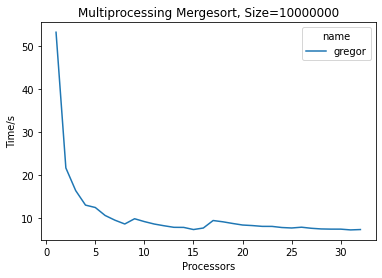

In [7]:
plot_benchmark_by_size(df, size, tag, files)

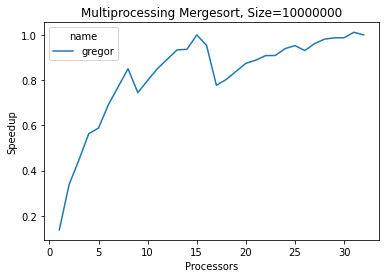

In [8]:
plot_benchmark_by_size(df, size=size, tag=tag, files=files, x="processors", y="speedup")

In [9]:
df.describe()

,processors,time,size,speedup
count,32.000000,32.000000,32.0,32.000000
mean,16.500000,10.605844,10000000.0,0.820339
std,9.380832,8.309627,0.0,0.205255
min,1.000000,7.232000,10000000.0,0.137745
25%,8.750000,7.678000,10000000.0,0.775879
50%,16.500000,8.218500,10000000.0,0.890436
75%,24.250000,9.432000,10000000.0,0.953113
max,32.000000,53.127000,10000000.0,1.011892


In [10]:
avg = pd.DataFrame()
for name in files:
    _df = generate_average(df, tag="multiprocessing_mergesort", name=name, size=100)
    avg = pd.concat([avg, _df])
avg.head()

,,,,time,speedup,tag,name
processors,name,size,tag,,,,


['gregor'] 10000000 multiprocessing_mergesort


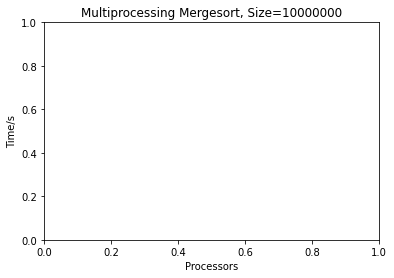

In [11]:
print(files, size, tag)
plot_benchmark_by_size(avg, size=size, tag=tag, files=files)

In [12]:
speedup = pd.DataFrame(avg)
speedup["p"] = speedup.index.get_level_values(0).astype(float)
speedup["speedup"] = speedup["time"] / speedup["p"]

In [13]:
speedup. head()

,,,,time,speedup,tag,name,p
processors,name,size,tag,,,,,


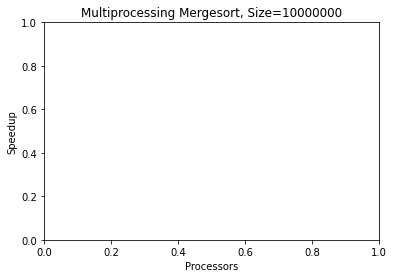

In [14]:
plot_benchmark_by_size(avg, size=size, tag=tag, files=files, x="processors", y="speedup")